<a href="https://colab.research.google.com/github/anveshkumar0206/waste_classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/Shareddrives/DATA 245 - ML/Waste_Collection___Diversion_Report__daily_.csv'
df_waste_collection = pd.read_csv(file_path)
df_waste_collection.head()
df_waste_collection.shape

(740873, 8)

In [4]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df_waste_collection.isnull().sum())


Missing values in the dataset:
Report Date         0
Load Type           0
Load Time           0
Load Weight     72335
Dropoff Site        0
Route Type          0
Route Number        0
Load ID             0
dtype: int64


In [5]:
# Handling missing values
df_waste_collection.dropna(inplace=True)  # Drop rows with missing values
df_waste_collection['Report Date'] = pd.to_datetime(df_waste_collection['Report Date'])

In [6]:
df_waste_collection.shape

(668538, 8)

In [7]:
# Feature Engineering
# Extract day of week and month from 'Report Date'
df_waste_collection['Day of Week'] = df_waste_collection['Report Date'].dt.dayofweek
df_waste_collection['Month'] = df_waste_collection['Report Date'].dt.month
df_waste_collection['Year'] = df_waste_collection['Report Date'].dt.year

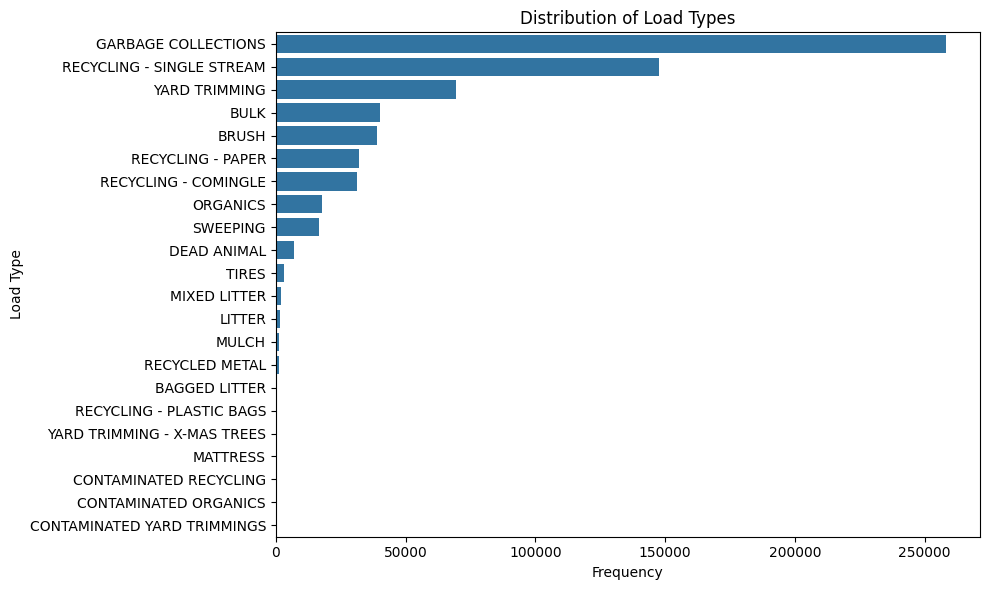

In [8]:
# Visualizations
# Distribution of Load Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_waste_collection, y='Load Type', order=df_waste_collection['Load Type'].value_counts().index)
plt.title('Distribution of Load Types')
plt.xlabel('Frequency')
plt.ylabel('Load Type')
plt.tight_layout()
plt.show()

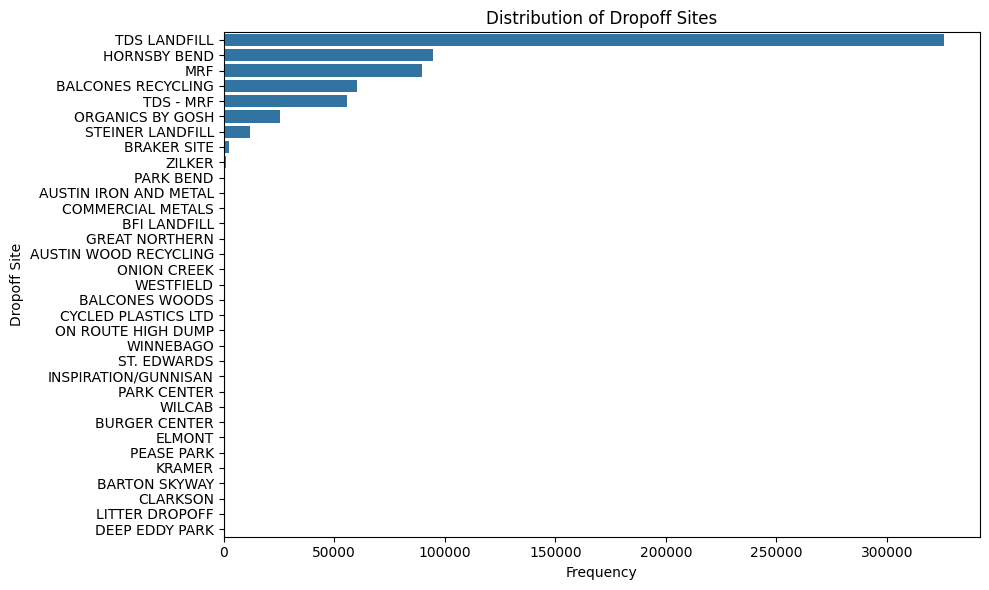

In [9]:
# Distribution of Dropoff Sites
plt.figure(figsize=(10, 6))
sns.countplot(data=df_waste_collection, y='Dropoff Site', order=df_waste_collection['Dropoff Site'].value_counts().index)
plt.title('Distribution of Dropoff Sites')
plt.xlabel('Frequency')
plt.ylabel('Dropoff Site')
plt.tight_layout()
plt.show()

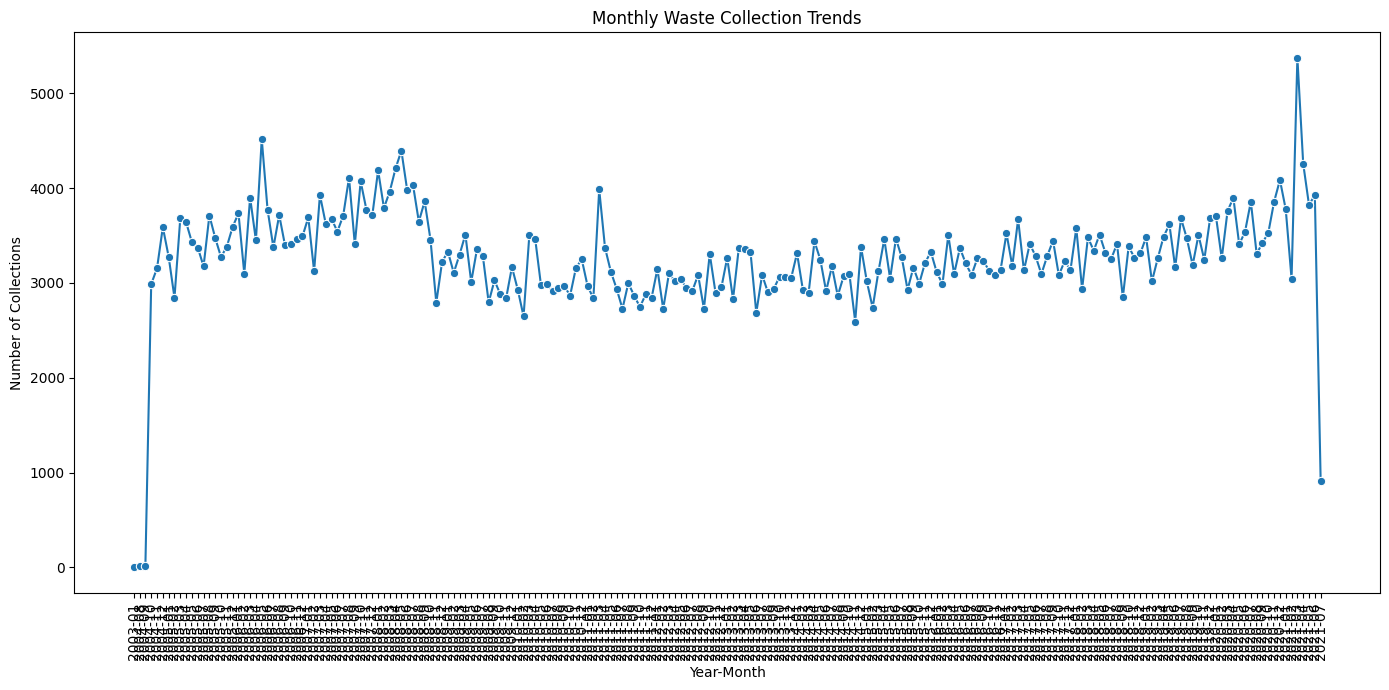

In [10]:
# Monthly Waste Collection Trends
df_waste_collection['Year-Month'] = df_waste_collection['Report Date'].dt.to_period('M')
monthly_trends = df_waste_collection.groupby('Year-Month').size().reset_index(name='Counts')
monthly_trends['Year-Month'] = monthly_trends['Year-Month'].astype(str)  # Convert to String for plotting

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='Year-Month', y='Counts', marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Waste Collection Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Collections')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


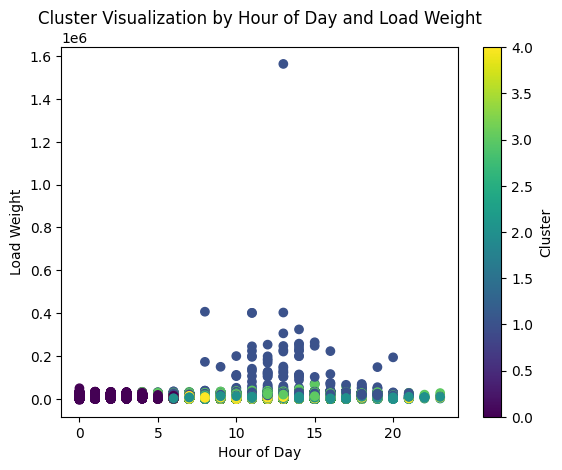

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert 'Report Date' and 'Load Time' to datetime
df_waste_collection['Report Date'] = pd.to_datetime(df_waste_collection['Report Date'])
df_waste_collection['Load Time'] = pd.to_datetime(df_waste_collection['Load Time'], format='%m/%d/%Y %I:%M:%S %p').dt.time

# Basic Feature Engineering
df_waste_collection['Day of Week'] = df_waste_collection['Report Date'].dt.dayofweek
df_waste_collection['Hour of Day'] = pd.to_datetime(df_waste_collection['Load Time'], format='%H:%M:%S').dt.hour

# Assume we want to cluster based on 'Day of Week', 'Hour of Day', and 'Load Weight'
# We need to handle missing values first
df_waste_collection['Load Weight'] = df_waste_collection['Load Weight'].fillna(df_waste_collection['Load Weight'].median())

# Standardize features
features = df_waste_collection[['Day of Week', 'Hour of Day', 'Load Weight']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Clustering (example using KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)
df_waste_collection['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters (simplified example)
plt.scatter(df_waste_collection['Hour of Day'], df_waste_collection['Load Weight'], c=df_waste_collection['Cluster'], cmap='viridis')
plt.title('Cluster Visualization by Hour of Day and Load Weight')
plt.xlabel('Hour of Day')
plt.ylabel('Load Weight')
plt.colorbar(label='Cluster')
plt.show()


Image classification

In [12]:
pip install imutils

In [13]:
from imutils import paths
imagePaths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

In [14]:
import os
def count_images(variable):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
    count = 0
    for item in variable:
        if isinstance(item, str) and any(item.lower().endswith(ext) for ext in image_extensions):
            count += 1
    return count
num_images = count_images(imagePaths)
print("Number of images:", num_images)

Number of images: 2527


In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['cardboard','glass','metal', 'paper', 'plastic', 'trash']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/Shareddrives/DATA 245 - ML/dataset-resized'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data
y=df.iloc[:,-1] #output data


loading... category : cardboard
loaded category:cardboard successfully
loading... category : glass
loaded category:glass successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : trash
loaded category:trash successfully


In [16]:
#data preprocessing
import cv2
import numpy as np
from imutils import paths

def preprocess_images(imagePaths, size=(64, 64)):
    # List to hold all preprocessed images
    data = []
    # Iterate through all the image paths
    for image_path in imagePaths:
        # Load the image
        image = cv2.imread(image_path)
        # Resize the image to the desired size
        image = cv2.resize(image, size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Normalize the pixel values (0-255 to 0-1)
        normalized_image = gray_image.astype("float") / 255.0
        # Flatten the image to make it a single array
        flat_image = normalized_image.flatten()
        # Append the processed image to the data list
        data.append(flat_image)
    return np.array(data)

# Preprocess all images
processed_data = preprocess_images(imagePaths)

print("Preprocessed data shape:", processed_data.shape)


Preprocessed data shape: (2527, 4096)


In [17]:
directory = "/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"
for filename in os.listdir(directory):
    print("Current file:", filename)  # Debugging output
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Convert filename to string (if necessary)
        filename = str(filename)
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image from {image_path}")
        else:
            # Proceed with processing
            print(f"Loaded {image_path} successfully")

Current file: trash
Current file: glass
Current file: cardboard
Current file: paper
Current file: metal
Current file: plastic


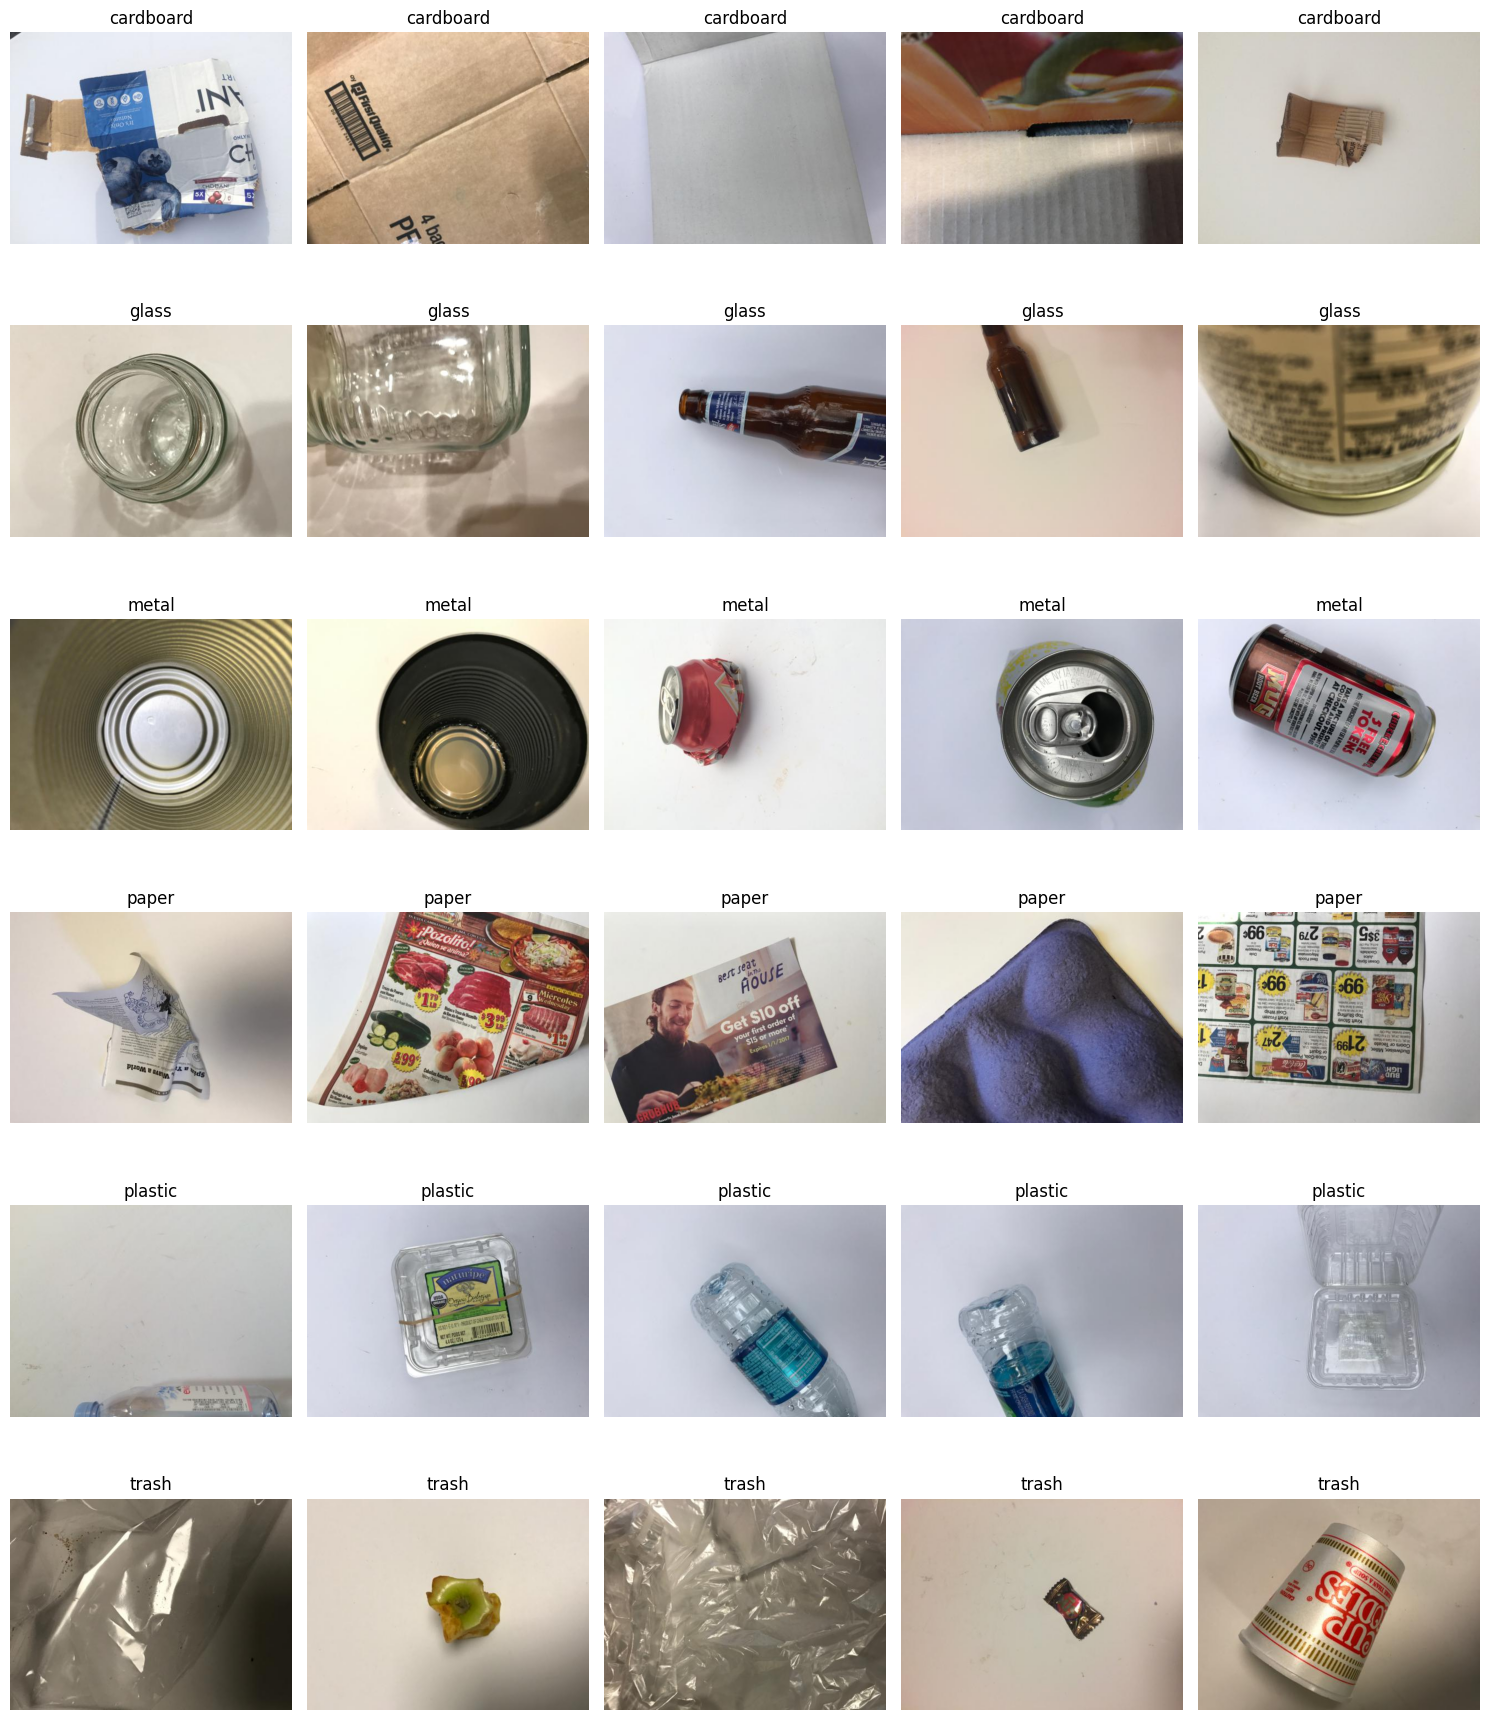

In [1]:
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Categories and directory setup
Categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
datadir = '/content/drive/Shareddrives/DATA 245 - ML/dataset-resized'  # Modify as per your actual path

# Lists to store data
flat_data_arr = []  # input array for features
target_arr = []     # output array for target labels
image_paths = []    # store image paths for reference

# Loading images and creating features
for category in Categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = imread(img_path)
        img_resized = resize(img_array, (150, 150, 3))  # resizing to 150x150x3
        flat_data_arr.append(img_resized.flatten())  # flatten the resized image
        target_arr.append(Categories.index(category))  # append category index to target array
        image_paths.append(img_path)  # append image path for visualization

# Create DataFrame
df = pd.DataFrame(flat_data_arr)  # create a DataFrame from the flat data
df['Target'] = target_arr  # add target labels
df['Image_Path'] = image_paths  # add image paths for reference

# Function to display sample images
def display_sample_images(df, num_samples=5):
    fig, axs = plt.subplots(len(Categories), num_samples, figsize=(15, 3 * len(Categories)))
    for i, category in enumerate(Categories):
        sample_df = df[df['Target'] == i].sample(num_samples, random_state=42)  # sampling images
        for j in range(num_samples):
            img = imread(sample_df.iloc[j]['Image_Path'])
            axs[i, j].imshow(img)
            axs[i, j].set_title(f"{category}")
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)


Feature Extraction

In [2]:
"""
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from imutils import paths

def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to ensure consistency
    gray_image = cv2.resize(gray_image, (128, 128))

    # 1. Edge Detection using the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # 2. Texture Features using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # 3. Color Histograms
    # Assuming you may want color histograms, we need to read the image in color mode and resize it
    color_image = cv2.imread(image_path)
    color_image = cv2.resize(color_image, (128, 128))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()

    return edges, lbp_hist, color_hist

# Example usage
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

# Iterate through the image paths, extracting and plotting features for each image
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)

        # Plotting the features
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(edges, cmap='gray')
        ax[0].set_title('Canny Edges')
        ax[1].bar(range(len(lbp_hist)), lbp_hist)
        ax[1].set_title('LBP Histogram')
        ax[2].bar(range(len(color_hist)), color_hist)
        ax[2].set_title('Color Histogram')
        plt.show()
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

"""


'\nimport cv2\nimport numpy as np\nfrom skimage import feature\nimport matplotlib.pyplot as plt\nfrom imutils import paths\n\ndef extract_features(image_path):\n    # Read the image\n    image = cv2.imread(image_path)\n    if image is None:\n        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")\n\n    # Convert to grayscale\n    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n\n    # Resize image to ensure consistency\n    gray_image = cv2.resize(gray_image, (128, 128))\n\n    # 1. Edge Detection using the Canny edge detector\n    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)\n\n    # 2. Texture Features using Local Binary Patterns\n    radius = 3\n    n_points = 8 * radius\n    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")\n    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))\n\n   

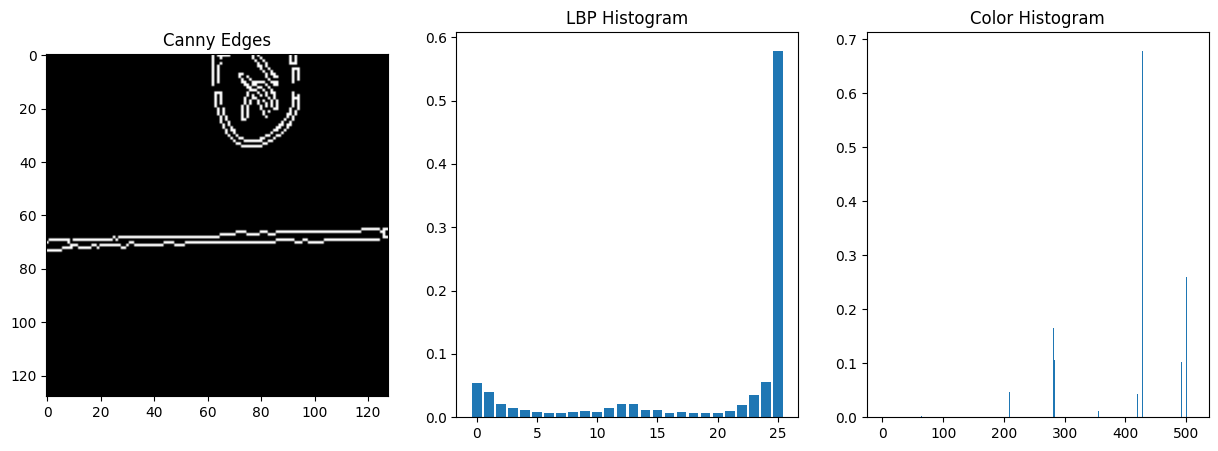

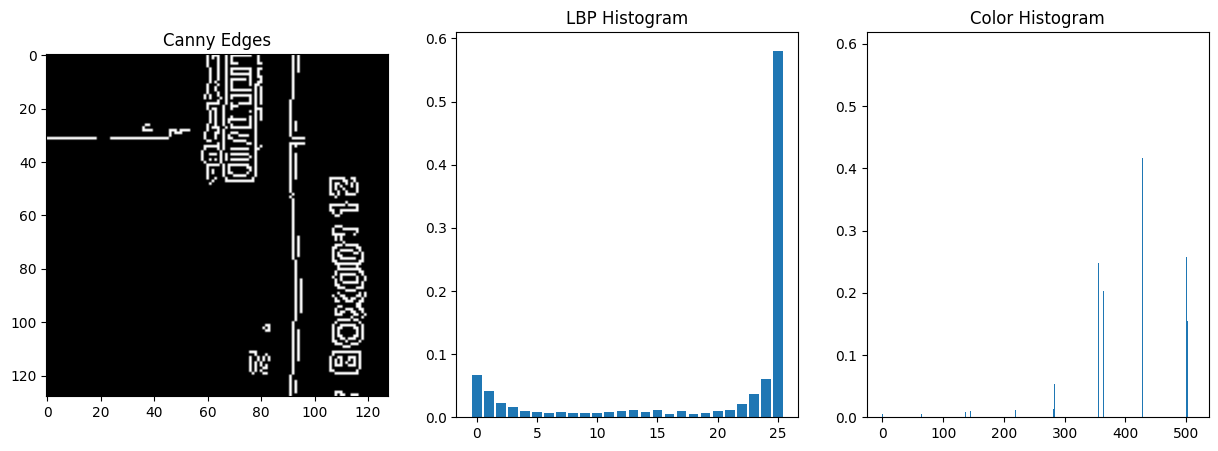

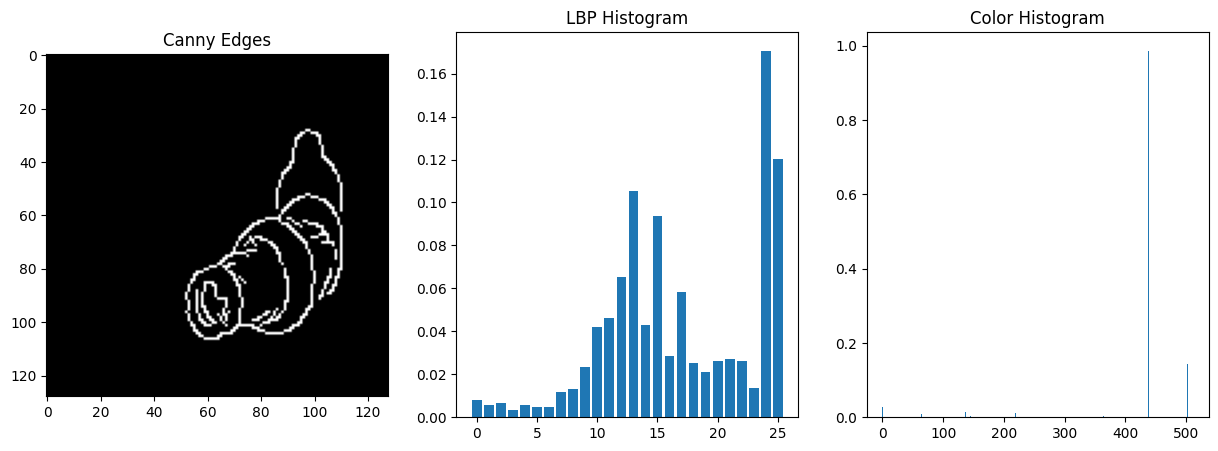

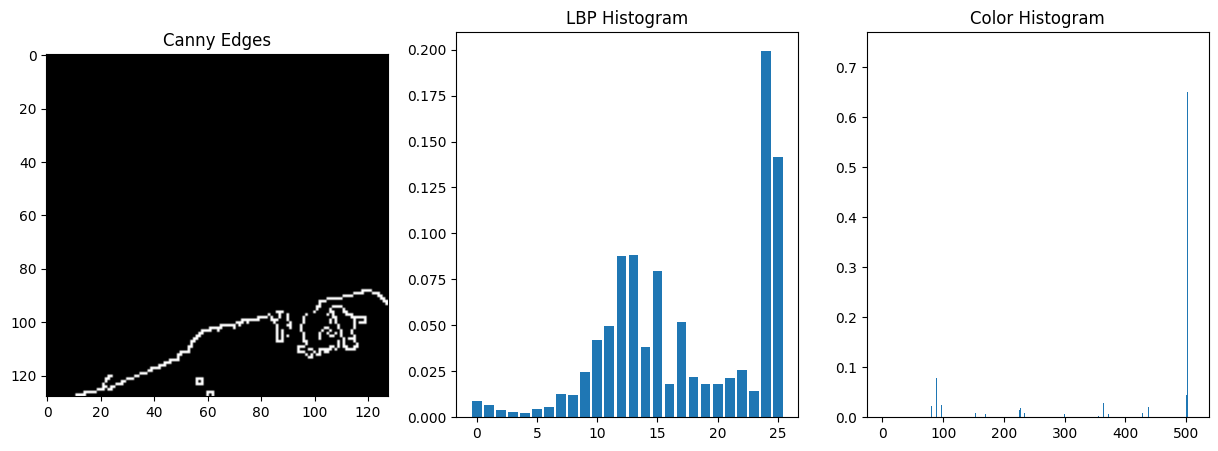

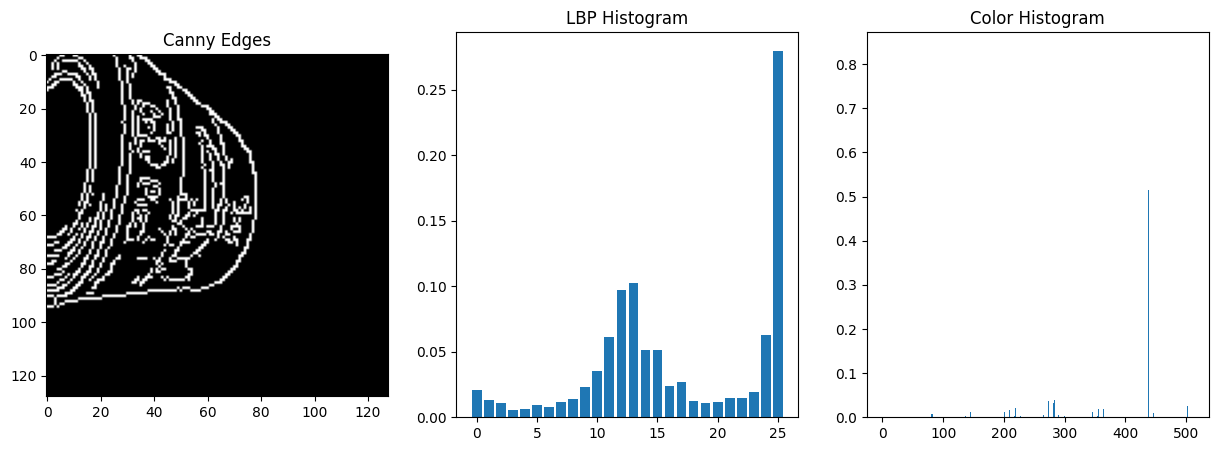

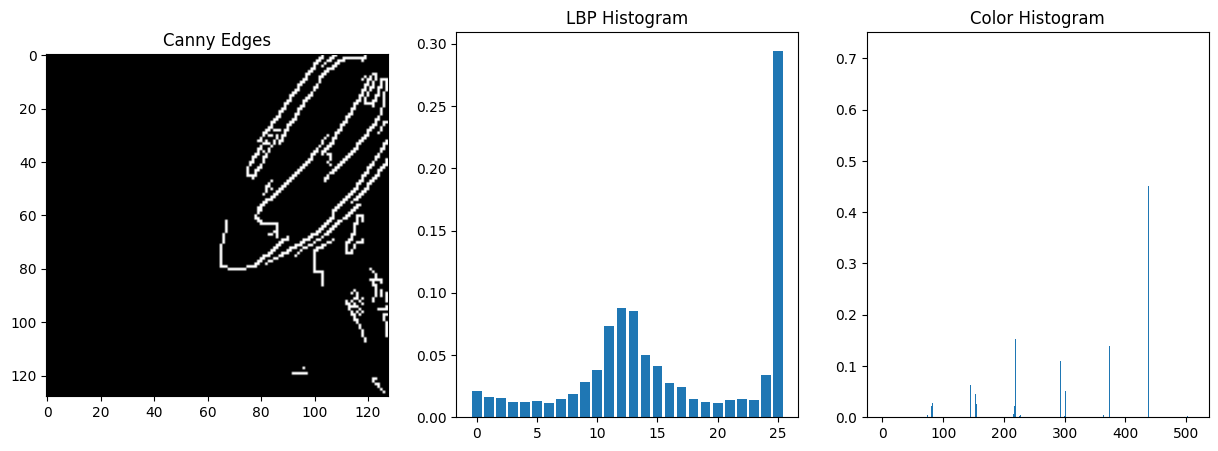

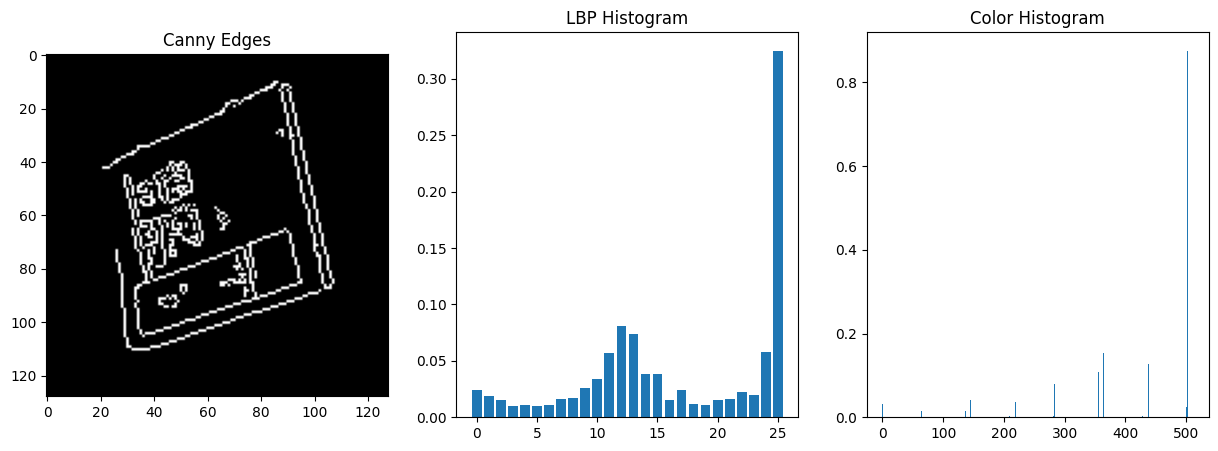

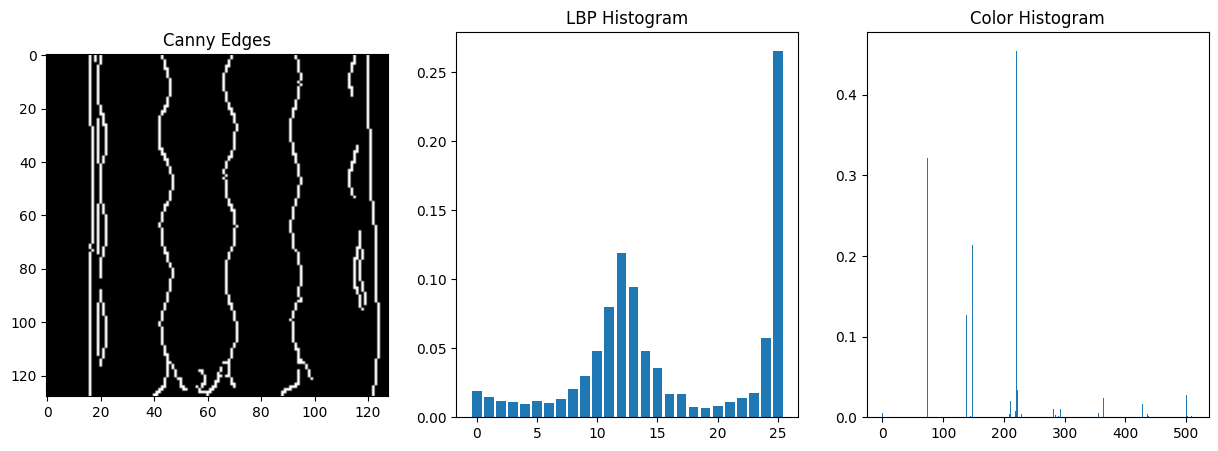

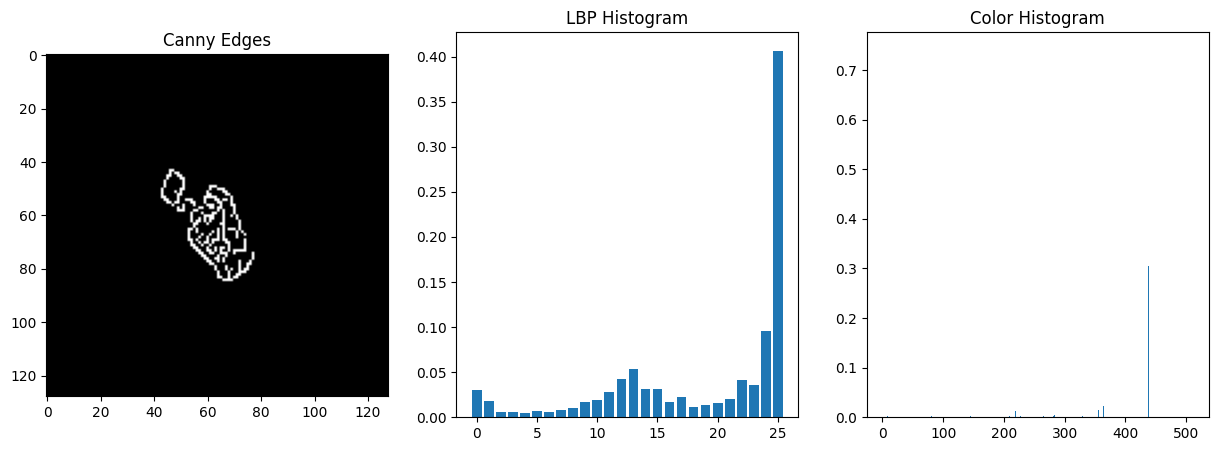

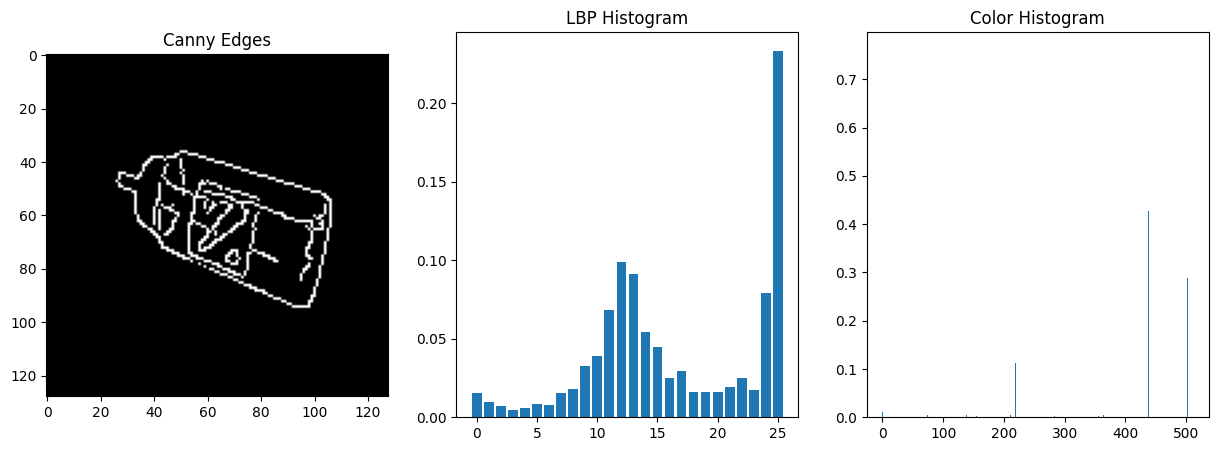

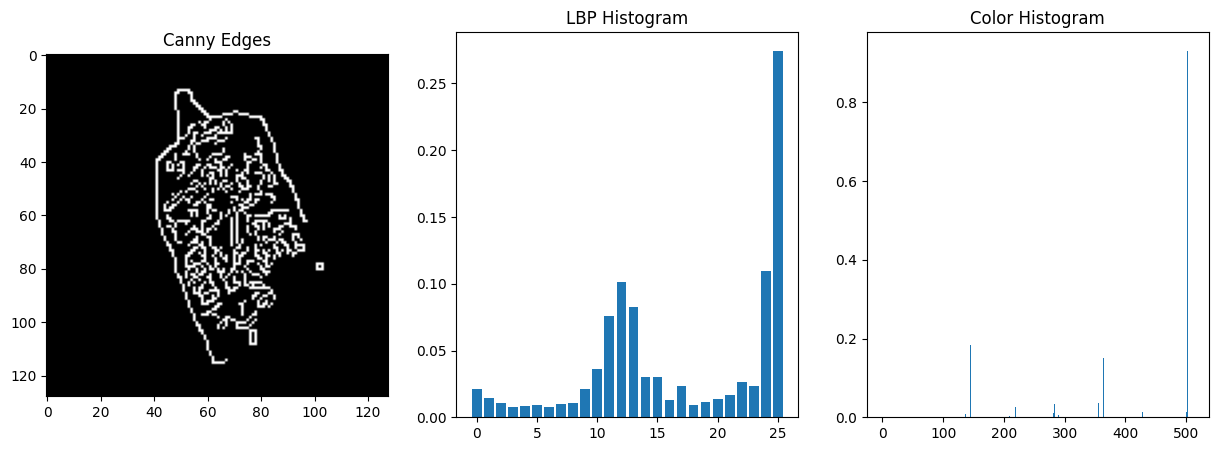

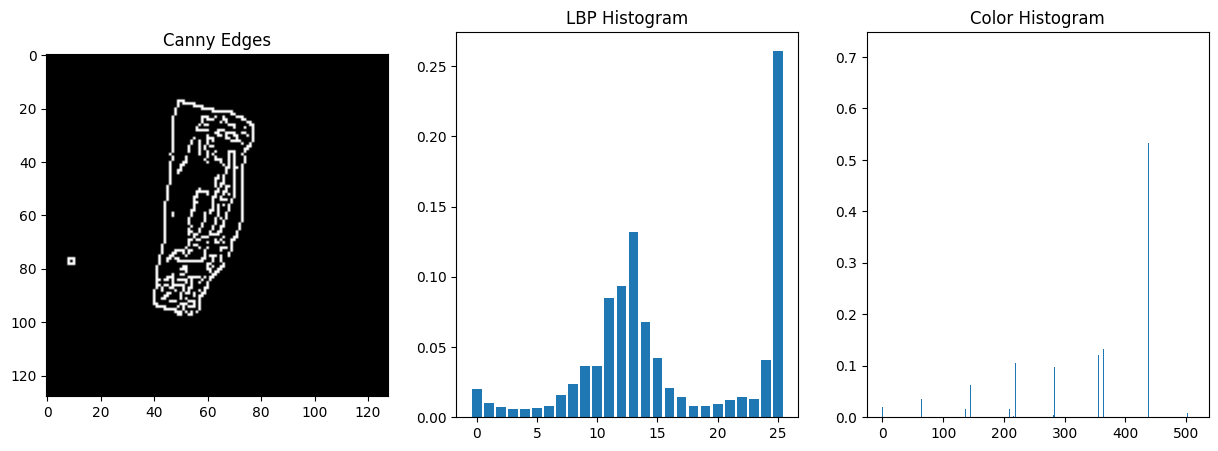

In [3]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from imutils import paths

def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to ensure consistency
    gray_image = cv2.resize(gray_image, (128, 128))

    # 1. Edge Detection using the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # 2. Texture Features using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # 3. Color Histograms
    color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Reading in color mode and correct RGB format
    color_image = cv2.resize(color_image, (128, 128))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()

    return edges, lbp_hist, color_hist

# Setup for different categories and limiting to 2 images per category
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
base_path = "/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"

# Iterate through each category
for category in categories:
    category_path = f"{base_path}/{category}"
    image_paths = list(paths.list_images(category_path))

    # Process only 2 images per category
    for image_path in image_paths[:2]:  # Change slice according to need
        try:
            edges, lbp_hist, color_hist = extract_features(image_path)

            # Plotting the features
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            ax[0].imshow(edges, cmap='gray')
            ax[0].set_title('Canny Edges')
            ax[1].bar(range(len(lbp_hist)), lbp_hist)
            ax[1].set_title('LBP Histogram')
            ax[2].bar(range(len(color_hist)), color_hist)
            ax[2].set_title('Color Histogram')
            plt.show()
        except Exception as e:
            print(f"Failed to process {image_path}: {e}")


Original feature dimension: 16922
Reduced feature dimension: 1796


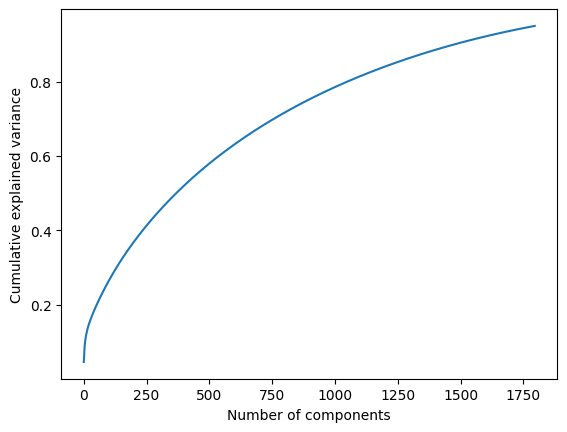

In [4]:
# PCA
import cv2
import numpy as np
from skimage import feature
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imutils import paths
import matplotlib.pyplot as plt

# Function to concatenate features into a single vector
def create_feature_vector(edges, lbp_hist, color_hist):
    return np.hstack([edges.flatten(), lbp_hist, color_hist])

# Get list of image paths
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

# Initialize a list to hold all feature vectors
feature_vectors = []

# Extract features for each image and create feature vectors
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)
        feature_vector = create_feature_vector(edges, lbp_hist, color_hist)
        feature_vectors.append(feature_vector)
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(feature_vectors)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Adjust this parameter as needed
pca_features = pca.fit_transform(feature_matrix_scaled)

# Now pca_features contains the reduced feature set for all images
print(f"Original feature dimension: {feature_matrix.shape[1]}")
print(f"Reduced feature dimension: {pca_features.shape[1]}")

# Optionally, visualize the explained variance ratio of each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')


Splitted Successfully


In [8]:
from sklearn.neighbors import KNeighborsClassifier


In [9]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune this parameter

# Train the classifier
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# After splitting the data
x_train = np.array(x_train)
x_test = np.array(x_test)

# Fit the classifier after ensuring the data is in the correct format
knn.fit(x_train, y_train)

# Then make predictions
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=Categories)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.4901185770750988
Confusion Matrix:
[[57 10  2  5  6  1]
 [ 9 55  5  6 22  3]
 [20 17 16  3 15 11]
 [16 26  2 46 28  1]
 [ 7 15  2  6 65  2]
 [ 3 10  1  1  3  9]]
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.51      0.70      0.59        81
       glass       0.41      0.55      0.47       100
       metal       0.57      0.20      0.29        82
       paper       0.69      0.39      0.49       119
     plastic       0.47      0.67      0.55        97
       trash       0.33      0.33      0.33        27

    accuracy                           0.49       506
   macro avg       0.50      0.47      0.46       506
weighted avg       0.52      0.49      0.47       506



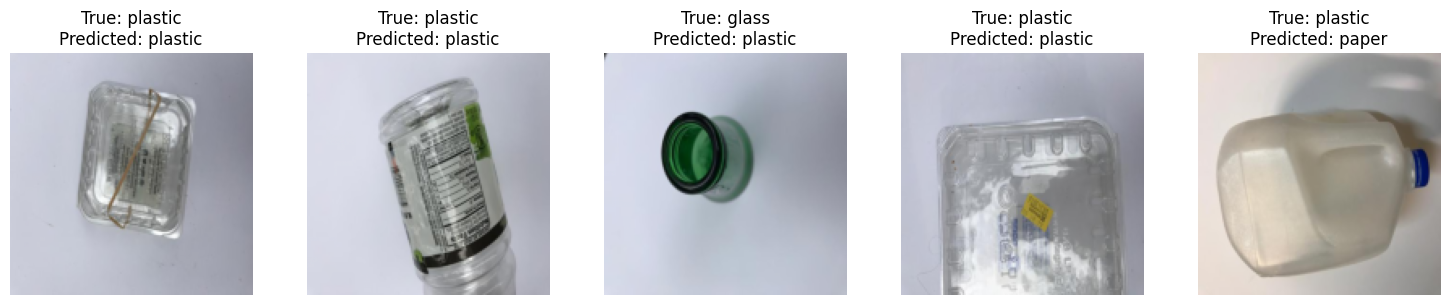

In [11]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays if needed
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

# Assuming 'x_test' has been reshaped or stored in the form of (num_samples, 150, 150, 3)
# Also assuming 'x_test' is a numpy array or a pandas DataFrame converted to numpy array

# Determine the number of images to display (min between 5 and the length of x_test)
num_images = min(5, len(x_test))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


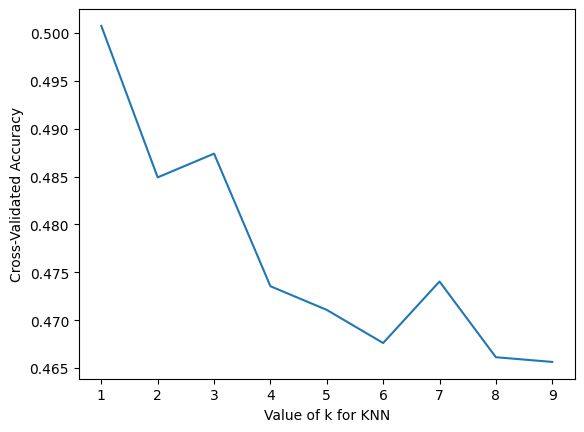

In [12]:
# adjust K value
from sklearn.model_selection import cross_val_score

# Try different values for k
k_values = range(1, 10)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plot the relationship between k and testing accuracy
plt.plot(k_values, accuracy_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [13]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': list(range(1, 10)), 'metric': ['euclidean', 'manhattan']}

randomized_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search.fit(x_train, y_train)

print("Best parameters:", randomized_search.best_params_)
print("Best cross-validation score: {:.2f}".format(randomized_search.best_score_))

#from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#param_grid = {'n_neighbors': list(range(1, 10)), 'metric': ['euclidean', 'manhattan']}

# Initialize the GridSearchCV object
#grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
#grid_search.fit(x_train, y_train)

# Print the best parameters and best score
#print("Best parameters:", grid_search.best_params_)
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 3, 'metric': 'manhattan'}
Best cross-validation score: 0.57


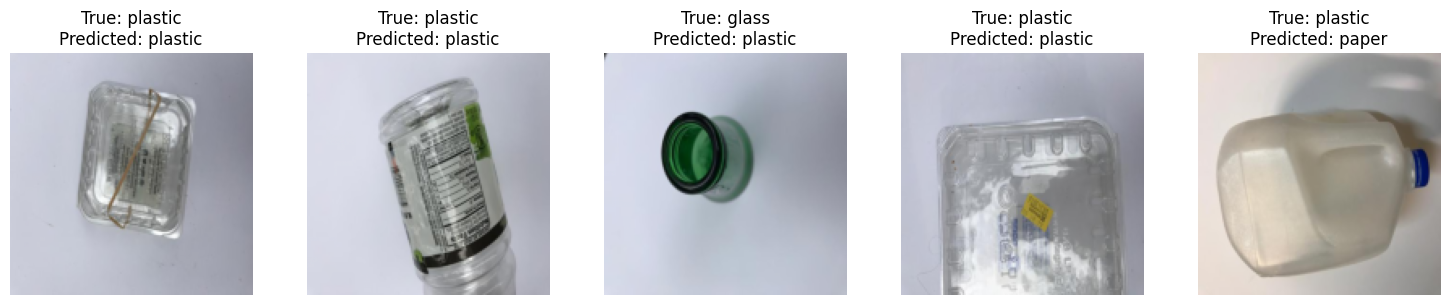

In [14]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays if needed
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

# Assuming 'x_test' has been reshaped or stored in the form of (num_samples, 150, 150, 3)
# Also assuming 'x_test' is a numpy array or a pandas DataFrame converted to numpy array

# Determine the number of images to display (min between 5 and the length of x_test)
num_images = min(5, len(x_test))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the best k (with the highest cross-validation accuracy)
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

# Now you can use optimal_k in your KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='manhattan')
knn.fit(x_train, y_train)

# Predict on the test data
y_pred = knn.predict(x_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


The optimal number of neighbors is 1
Accuracy: 0.6205533596837944
Confusion Matrix:
 [[64  6  0  5  5  1]
 [ 4 58 11  8 17  2]
 [ 6 12 34  4 17  9]
 [10 11  3 69 20  6]
 [ 3  8  9  7 68  2]
 [ 0  1  0  1  4 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        81
           1       0.60      0.58      0.59       100
           2       0.60      0.41      0.49        82
           3       0.73      0.58      0.65       119
           4       0.52      0.70      0.60        97
           5       0.51      0.78      0.62        27

    accuracy                           0.62       506
   macro avg       0.62      0.64      0.62       506
weighted avg       0.63      0.62      0.62       506



In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNN classifier with 3 as the number of neighbors
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train, y_train)  # Train the classifier using the training data

# Predict on the test data
y_pred = knn.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy with 3 neighbors: {accuracy}')
print('Confusion Matrix with 3 neighbors:\n', conf_matrix)
print('Classification Report with 3 neighbors:\n', class_report)


Accuracy with 3 neighbors: 0.5770750988142292
Confusion Matrix with 3 neighbors:
 [[63  5  3  3  4  3]
 [ 6 60  7  6 20  1]
 [14 18 27  1 16  6]
 [19 17  4 61 16  2]
 [ 4 13  5  5 68  2]
 [ 3  9  0  0  2 13]]
Classification Report with 3 neighbors:
               precision    recall  f1-score   support

           0       0.58      0.78      0.66        81
           1       0.49      0.60      0.54       100
           2       0.59      0.33      0.42        82
           3       0.80      0.51      0.63       119
           4       0.54      0.70      0.61        97
           5       0.48      0.48      0.48        27

    accuracy                           0.58       506
   macro avg       0.58      0.57      0.56       506
weighted avg       0.60      0.58      0.57       506



Weighted KNN

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Example weights for each feature; you need to define these based on your dataset
# Assume df has 450 features (flattened 150x150 image), adjust according to your actual number of features
weights = np.random.rand(df.shape[1] - 2)  # Random weights for illustration; replace with your actual weights

# Scale features by weights
# Ignore the last column which is 'Image_Path' and second last which is 'Target'
weighted_features = df.iloc[:, :-2].multiply(weights, axis=1)

# Use StandardScaler or another method to scale these weighted features
scaler = StandardScaler()
weighted_features_scaled = scaler.fit_transform(weighted_features)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(weighted_features_scaled, df['Target'], test_size=0.20, random_state=77, stratify=df['Target'])

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict and evaluate
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Weighted feature KNN Accuracy: {accuracy}")


Weighted feature KNN Accuracy: 0.4841897233201581


Decision Tree Classifier

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')


Splitted Successfully


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_clf.fit(x_train, y_train)

# Predict on the test set
dt_pred = dt_clf.predict(x_test)

# Evaluate the classifier
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.4723320158102767
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        81
           1       0.43      0.43      0.43       100
           2       0.33      0.32      0.32        82
           3       0.63      0.58      0.60       119
           4       0.46      0.49      0.48        97
           5       0.36      0.37      0.36        27

    accuracy                           0.47       506
   macro avg       0.45      0.45      0.45       506
weighted avg       0.47      0.47      0.47       506



In [6]:

# Convert to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Create DataFrame and adjust column names
df = pd.DataFrame(flat_data)  # Convert feature data to DataFrame
df.columns = [str(i) for i in df.columns]  # Ensure all column names are string
df['Target'] = target  # Add target column

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, df['Target'], test_size=0.20, random_state=42, stratify=df['Target'])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)  # Train the classifier

# Predict on the test data and evaluate
y_pred = dtree.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.45849802371541504
Confusion Matrix:
 [[37  8 13 10  6  7]
 [ 5 43 15 16 16  5]
 [ 7 21 25  9 14  6]
 [11 13 12 66 11  6]
 [ 7 21  9 10 48  2]
 [ 2  2  4  4  2 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.46      0.49        81
           1       0.40      0.43      0.41       100
           2       0.32      0.30      0.31        82
           3       0.57      0.55      0.56       119
           4       0.49      0.49      0.49        97
           5       0.33      0.48      0.39        27

    accuracy                           0.46       506
   macro avg       0.44      0.45      0.45       506
weighted avg       0.46      0.46      0.46       506



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best estimator
best_dtree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Predict on the test data using the best parameters
y_pred = best_dtree.predict(x_test)
print(f'Improved Accuracy: {accuracy_score(y_test, y_pred)}')


Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Set up parameter grid to tune the hyperparameters using random distributions
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize a RandomizedSearchCV object with 100 iterations and a random state for reproducibility
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_dtree = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.2f}")

# Predict on the test data using the best parameters
y_pred = best_dtree.predict(x_test)
print(f'Improved Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [7]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Initialize PCA
pca = PCA(n_components=0.95)  # Adjust number of components to retain 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train decision tree on reduced features
dtree_pca = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                   random_state=42)
dtree_pca.fit(x_train_pca, y_train)
y_pred_pca = dtree_pca.predict(x_test_pca)
print(f'PCA-based Accuracy: {accuracy_score(y_test, y_pred_pca)}')


NameError: name 'grid_search' is not defined

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Set up parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Initialize PCA
pca = PCA(n_components=0.95)  # Adjust number of components to retain 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train decision tree on reduced features
dtree_pca = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                   random_state=42)
dtree_pca.fit(x_train_pca, y_train)
y_pred_pca = dtree_pca.predict(x_test_pca)
print(f'PCA-based Accuracy: {accuracy_score(y_test, y_pred_pca)}')


PCA-based Accuracy: 0.40711462450592883


In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(dtree, x_train, y_train, cv=10)  # 10-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean accuracy: {:.2f}".format(scores.mean()))


In [ ]:
# random subspaces
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the classifier
random_forest.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(x_test)

# Evaluate the classifier
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))


In [ ]:
# bootstrap sampling
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with decision trees
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                n_estimators=50, random_state=42, n_jobs=-1)

# Train the classifier
bagging_clf.fit(x_train, y_train)

# Predict on the test data
y_pred_bagging = bagging_clf.predict(x_test)

# Evaluate the classifier
print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging)}')
print('Bagging Confusion Matrix:\n', confusion_matrix(y_test, y_pred_bagging))
print('Bagging Classification Report:\n', classification_report(y_test, y_pred_bagging))


# cross validation, parameter tuning



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=77)

# Train the classifier
svm_classifier.fit(x_train_scaled, y_train)


In [ ]:
# evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = svm_classifier.predict(x_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
